Shape of headlines dataset: (19685, 2)
Shape of TF-IDF features: (19685, 1000)
Sample headlines:
    idx                                           headline
0    0  Country Living Appraises A 1950s Jiffy-Way Egg...
1    1  Kylie Jenner's Beauty Routine Is More Like You...
2    2  These Celebrity Vegetarians Will Pass On The T...
3    3                The Sharing Economy at a Crossroads
4    4                     What Happened To Scott Walker?


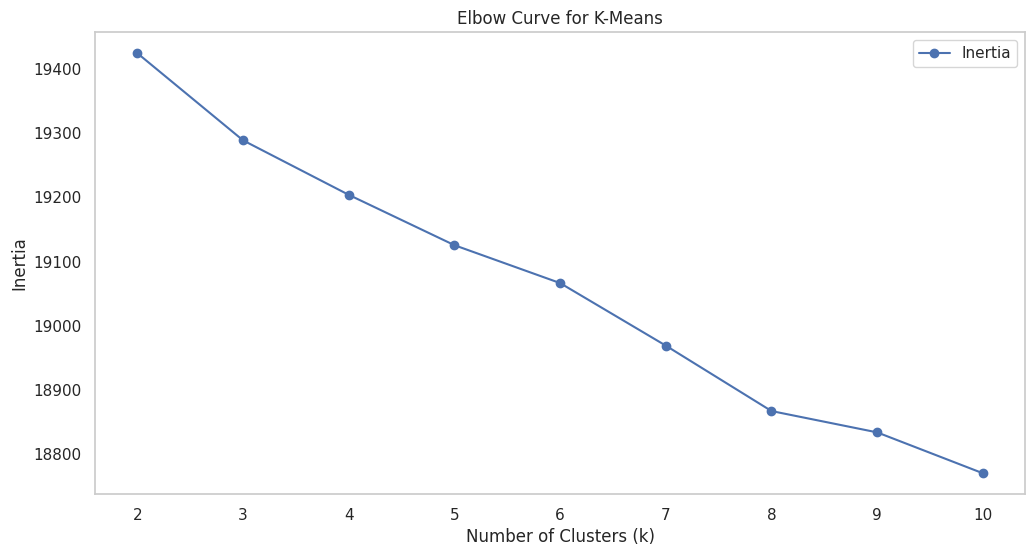

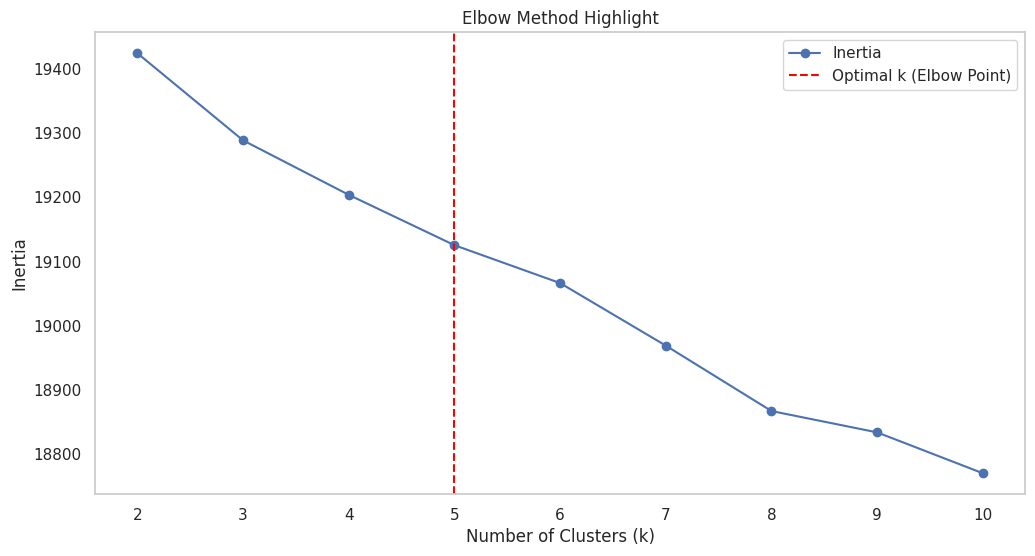

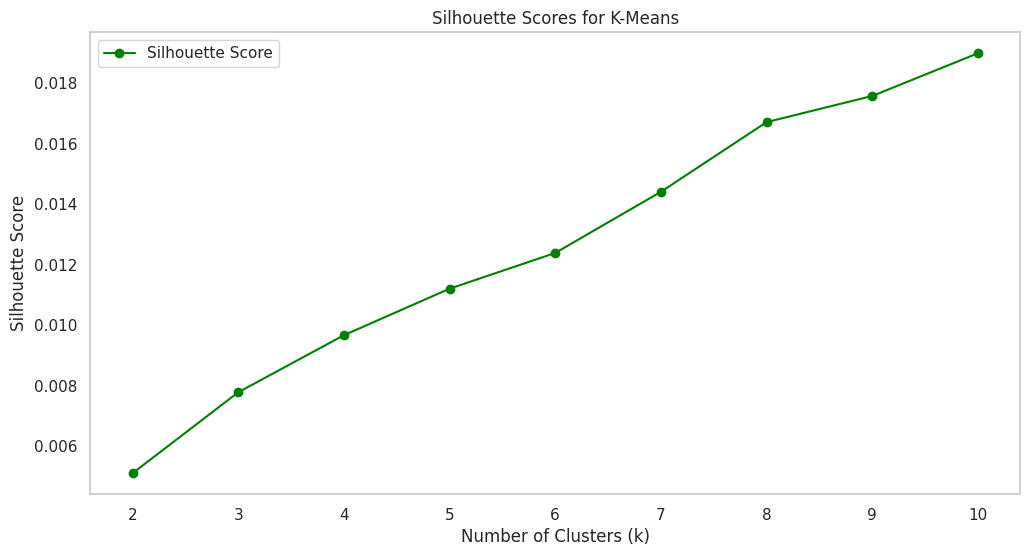

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for visualizations
sns.set(style='whitegrid')

# Task 1: Load and Explore the Dataset
# Load the data
headlines = pd.read_csv("/content/drive/MyDrive/Assignment 3/headlines.csv")
tfidf_features = np.load("/content/drive/MyDrive/Assignment 3/tfidf_features.npy")

# Check the shapes
print("Shape of headlines dataset:", headlines.shape)
print("Shape of TF-IDF features:", tfidf_features.shape)

# Display a few headlines
print("Sample headlines:\n", headlines.head())

# Task 2: Perform K-Means Clustering
# Determine the optimal number of clusters using the Elbow Method and Silhouette Score
inertia = []
sil_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(tfidf_features)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(tfidf_features, kmeans.labels_))

# Plot the Elbow Curve
plt.figure(figsize=(12, 6))
plt.plot(k_values, inertia, marker='o', label='Inertia')
plt.title('Elbow Curve for K-Means')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.legend()
plt.grid()
plt.show()

# Additional visualization to highlight the elbow point
plt.figure(figsize=(12, 6))
plt.plot(k_values, inertia, marker='o', label='Inertia')
plt.axvline(x=5, color='red', linestyle='--', label='Optimal k (Elbow Point)')
plt.title('Elbow Method Highlight')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.legend()
plt.grid()
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(12, 6))
plt.plot(k_values, sil_scores, marker='o', color='green', label='Silhouette Score')
plt.title('Silhouette Scores for K-Means')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid()
plt.show()


Cluster 0:
['Do the Promenade at Three Peerless Florida Piers (PHOTOS)'
 'The Best Food Tumblrs: The Top 10 Of April (PHOTOS)'
 "Kourtney Kardashian's Beauty Evolution (PHOTOS)"
 'Caramelized Onion Recipes That Take Food To The Next Level (PHOTOS)'
 'Katy Perry Back In 2002 Dressed A Whole Lot Like Us (PHOTOS)'
 'The 8 Best Online Magazines For Those Who Love Decor, Crafts And All Things Home (PHOTOS)'
 'Equestrian Wedding Inspiration (PHOTOS)'
 'Whitney Houston Dies, Her Glittering Style Remembered (PHOTOS)'
 'Beyonce Nails National Anthem With Hot Orange Manicure At The 2013 Inauguration (PHOTOS)'
 "Camilla Parker-Bowles' Style Evolution: From Prince Charles' Famous 'Other Woman' To Duchess Of Cornwall (PHOTOS)"]

Cluster 1:
["Larry David Goes To The  Dark Side With Death Camp Pick-Up Lines On 'SNL'"
 'A Shared Trauma: The Death of Pan Am'
 "Death Row Inmates In Limbo After Florida's Death Penalty Scheme Scrapped"
 "Hillary Clinton's Confusing And Conflicted Stance On The Minimum Wa

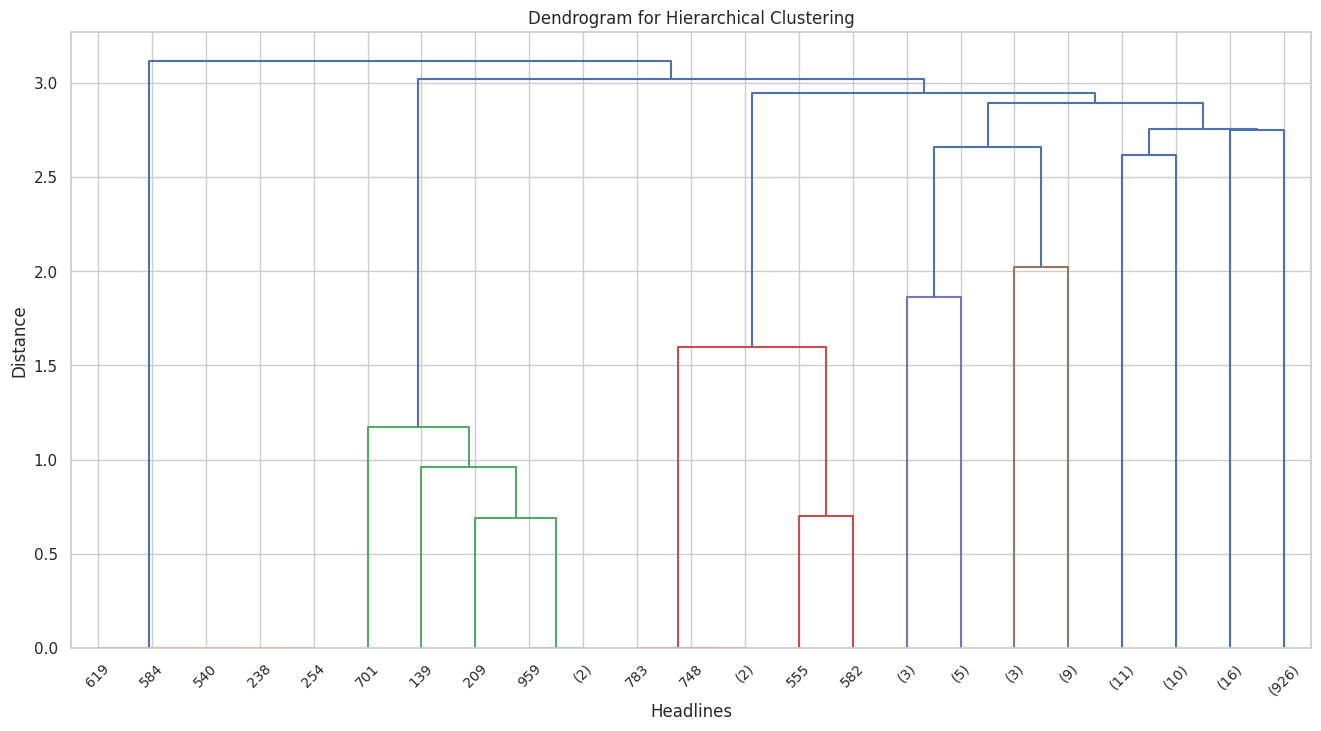

<ipython-input-2-188270db5d6c>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_headlines['Hierarchical_Cluster'] = hierarchical_clusters



Hierarchical Clustering Themes:

Cluster 1:
['Camilla, Duchess Of Cornwall, Wears A Gaga-Worthy Hat (PHOTOS)'
 'Hawaii For Every Traveler (PHOTOS)'
 '13 Ingredients That Ruin Guacamole For Everyone (PHOTOS)'
 'How Ronda Rousey Fought Back After Discovering Nude Photos Of Her'
 '5 Outrageous Honeymoon Suites (PHOTOS)']

Cluster 2:
['The Most Handicap-Accessible Destinations Around the World'
 'Where In The World Are People Most Depressed?'
 'While The Rest Of The World Retreats, China Expands Investment In The Arab World'
 'How to Find Happiness in a Hectic World' 'A World Without Bullies'
 'Miley Cyrus And Liam Hemsworth Smooch On NYE, And The World Notices']

Cluster 3:
['Bill Maher Points Out How Frighteningly Similar Donald Trump Sounds To Hitler'
 'Angela Merkel And Donald Trump Have Spoken, Discussed Continuing U.S.-German Ties'
 "Controversial 'South Park' Episode Depicts Donald Trump Being Raped And Killed"
 "'South Park' Creators Actually Will Continue To Parody Donald Trump"


In [2]:
# Choose optimal k (based on the elbow curve and silhouette score)
optimal_k = 10  # Replace this with the observed optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10, max_iter=300)
kmeans.fit(tfidf_features)

# Assign headlines to clusters
headlines['Cluster'] = kmeans.labels_

# Analyze contents of three clusters
for cluster in range(3):  # Analyze first three clusters
    print(f"\nCluster {cluster}:")
    print(headlines[headlines['Cluster'] == cluster].head(10)['headline'].values)

# Task 3: Perform Hierarchical Clustering on a Subset
# Select a random subset of 1,000 headlines
subset_indices = np.random.choice(range(len(headlines)), size=1000, replace=False)
subset_tfidf = tfidf_features[subset_indices]
subset_headlines = headlines.iloc[subset_indices]

# Perform Hierarchical Clustering
linked = linkage(subset_tfidf, method='ward')

# Plot dendrogram
plt.figure(figsize=(16, 8))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Headlines')
plt.ylabel('Distance')
plt.show()

# Assign clusters based on dendrogram
hierarchical_clusters = fcluster(linked, t=5, criterion='maxclust')
subset_headlines['Hierarchical_Cluster'] = hierarchical_clusters

# Task 4: Compare and Summarize
# Compare themes in K-Means and Hierarchical Clustering
print("\nHierarchical Clustering Themes:")
for cluster in range(1, 4):  # Analyze first three clusters
    print(f"\nCluster {cluster}:")
    print(subset_headlines[subset_headlines['Hierarchical_Cluster'] == cluster].head(10)['headline'].values)

# Optional Task: Clustering with PCA-Reduced Features
# Reduce TF-IDF to 50 dimensions
pca = PCA(n_components=50, random_state=42)
tfidf_reduced = pca.fit_transform(tfidf_features)

# K-Means on PCA-reduced data
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42, n_init=10, max_iter=300)
kmeans_pca.fit(tfidf_reduced)
headlines['PCA_Cluster'] = kmeans_pca.labels_

print("\nComparison of Clusters with PCA-reduced data:")
for cluster in range(3):  # Analyze first three clusters
    print(f"\nCluster {cluster}:")
    print(headlines[headlines['PCA_Cluster'] == cluster].head(10)['headline'].values)

# Save results
headlines.to_csv("headlines_with_clusters.csv", index=False)